## 数据可视化

In [ ]:
import numpy as np
import random
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans 

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

: 

# sklearn

In [3]:
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd

### 加载数据集
iris = pd.read_csv('../data/iris.csv')
iris.rename(columns={"sepal.length": "sepal_length",
                     "sepal.width": "sepal_width",
                     "petal.length": "petal_length",
                     "petal.width": "petal_width"}, 
            inplace=True)


X = iris.iloc[:, [2, 3]].values ## 第3/4列数据
# X = iris.iloc[:, [2]].values ## 第3/4列数据
y = iris['target'] = iris['variety'].astype('category').cat.codes
## 编码字典
target2label = dict(zip(iris['variety'].values, iris['target'].values))

iris


,sepal_length,sepal_width,petal_length,petal_width,variety,target
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


#### 数据集拆分 及 归一化处理

###### StandardScaler：当数据(x)按均值(μ)中心化后，再按标准差(σ)缩放，数据就会服从为均值为0，方差为1的正态分布（即标准正态分布），而这个过程，就叫做数据标准化（Standardization，又称Z-Score normalization）

In [4]:
#### 显示数据分布
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


3.7580000000000005 4.35 1.759404065775303


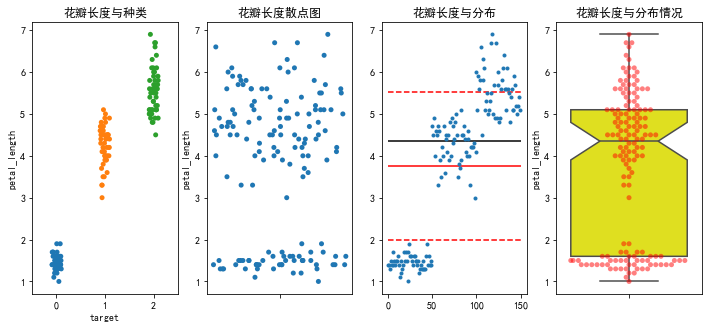

In [5]:
### 绘图

mean_pl = np.mean(iris['petal_length'].values, axis=0)
median_pl = np.median(iris['petal_length'].values, axis=0)
std_pl = np.std(iris['petal_length'].values, axis=0)

fig,axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
sns.stripplot(x="target", y="petal_length",jitter=True, data=iris, ax=axes[0]), axes[0].set_title('花瓣长度与种类')
sns.stripplot(y="petal_length", data=iris, ax=axes[1], linewidth=0.01), axes[1].set_title('花瓣长度散点图')

axes[2].plot(np.arange(len(iris['petal_length'].tolist())), iris['petal_length'].tolist(), '.'),axes[2].set_title('花瓣长度与分布')
axes[2].hlines(y=mean_pl, xmin=0, xmax=len(iris['petal_length'].tolist()), color='r', linestyles='solid')
axes[2].hlines(y=median_pl, xmin=0, xmax=len(iris['petal_length'].tolist()), color='black', linestyles='solid')
axes[2].hlines(y=mean_pl + std_pl, xmin=0, xmax=len(iris['petal_length'].tolist()), color='r', linestyles='dashed')
axes[2].hlines(y=mean_pl - std_pl, xmin=0, xmax=len(iris['petal_length'].tolist()), color='r', linestyles='dashed')

sns.swarmplot(y=iris.petal_length, ax=axes[3], alpha=0.5, color='r'), axes[3].set_title('花瓣长度与分布情况')
sns.boxplot(y="petal_length", data=iris, ax=axes[3], color='yellow', notch = True)


print(mean_pl, median_pl, std_pl)

### 花瓣长度(petal-length)在不同组间差异较大

##### 和sepal_width、sepal_length相比，petal_length、petal_width在不同组间variety 差异较大，即在不同组间有较好的区分度

In [6]:

# iris['variety'] = iris['variety'].astype('category')
pd.pivot_table(iris,  columns=['variety'], aggfunc='mean')


variety,Setosa,Versicolor,Virginica
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
target,0.000,1.000,2.000


In [7]:
def get_std(column, variety, method=1):
    data = iris[iris["variety"]==variety][column].values
    v = np.std(data) if method == 1 else np.mean(data)
    
    return v

names = ["Setosa", "Versicolor", "Virginica"]
factors = ["petal_length", 'petal_width', 'sepal_length', 'sepal_width']

from collections import defaultdict

std = defaultdict(list)
for variety in names:
    for column in factors:
        v = get_std(column, variety)
        std[variety].append(v)

mean = defaultdict(list)
for variety in names:
    for column in factors:
        v = get_std(column, variety, method=2)
        mean[variety].append(v)

std=pd.DataFrame(std, index=factors)
mean=pd.DataFrame(mean, index=factors)
mean

,Setosa,Versicolor,Virginica
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974


In [8]:
std

,Setosa,Versicolor,Virginica
petal_length,0.171919,0.465188,0.546348
petal_width,0.104326,0.195765,0.271890
sepal_length,0.348947,0.510983,0.629489
sepal_width,0.375255,0.310644,0.319255


#### mean、std 也正好说明：petal_length、petal_width区分布较好。

## 数据可视化

#### https://seaborn.pydata.org/

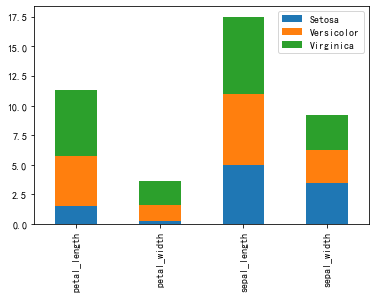

In [9]:
mean.plot(kind='bar',stacked=True)

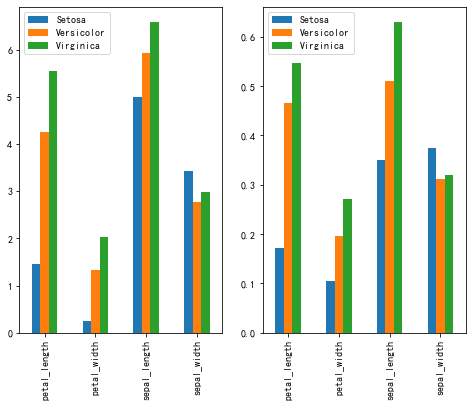

In [10]:
fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(8,6))
mean.plot(kind="bar", ax=ax[0])
std.plot(kind="bar", ax=ax[1])

In [11]:
print(np.mean(iris['petal_length'].values), np.std(iris['petal_length'].values))
print(np.mean(iris['petal_width'].values), np.std(iris['petal_width'].values))
print(np.mean(iris['sepal_length'].values), np.std(iris['sepal_length'].values))
print(np.mean(iris['sepal_width'].values), np.std(iris['sepal_width'].values))

3.7580000000000005 1.759404065775303
1.1993333333333336 0.7596926279021594
5.843333333333334 0.8253012917851409
3.0573333333333337 0.4344109677354946


### 花瓣长度(petal-length)分布

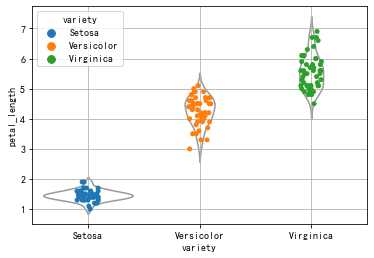

In [12]:
factor = 'petal_length'
sns.stripplot(x="variety", y=factor,jitter=True, data=iris, hue='variety')
sns.violinplot(x="variety", y =factor, data=iris, color='w', inner=None)
plt.grid(True)

#### 花瓣宽度(petal-width)分布

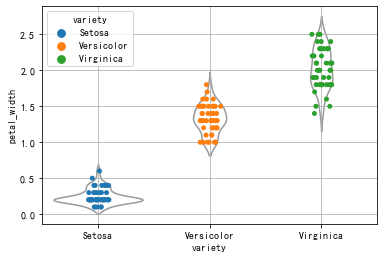

In [13]:
factor = "petal_width"
sns.stripplot(x="variety", y=factor, jitter=True, data=iris, hue='variety')
sns.violinplot(x="variety", y=factor, data=iris, color='w', inner=None)
plt.grid(True)

#### 萼片宽度(sepal-width)分布

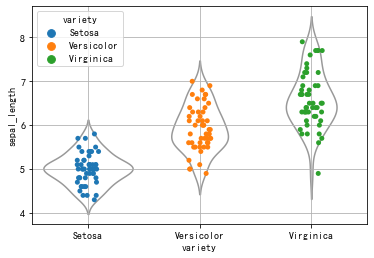

In [14]:
factor = "sepal_length"
sns.stripplot(x="variety", y=factor, jitter=True, data=iris, hue='variety')
sns.violinplot(x="variety", y=factor, data=iris, color='w', inner=None)
plt.grid(True)

#### 萼片宽度（sepal-width）分布

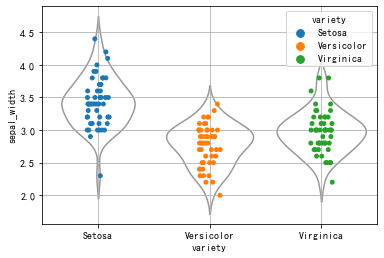

In [15]:
factor = "sepal_width"
sns.stripplot(x="variety", y=factor, jitter=True, data=iris, hue='variety')
sns.violinplot(x="variety", y=factor, data=iris, color='w', inner=None)
plt.grid(True)

#### Stripplot
Stripplot的本质就是把数据集中具有quantitative属性的变量按照类别去做散点图(Scatterplot)。

##### 上边左侧的图片便是在默认风格下用stripplot绘制的散点图。在很多情况下，stripplot中的点会重叠，使得我们不容易看出点的分布情况。一个简单的解决办法就是用在stripplot的基础上绘制抖动图(jitterplot)，仅沿着类别坐标轴的方向去随机微调整点的位置，显示出分布情况。

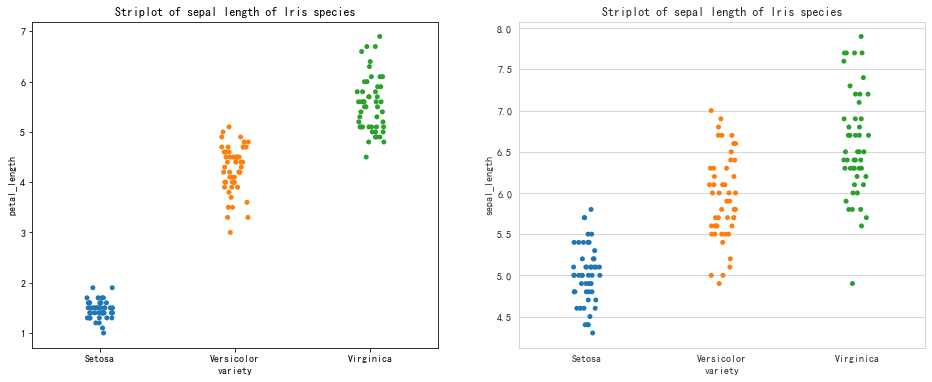

In [16]:
plt.figure(1,figsize=(16,6))

plt.subplot(1,2,1)
sns.stripplot(x='variety',y='petal_length',data=iris) #stripplot
plt.title('Striplot of sepal length of Iris species')

with sns.axes_style("whitegrid"): # 这个是临时设置样式的命令，如果不写，则按默认格式'darkgrid'进行绘制
    plt.subplot(1,2,2)
    plt.title('Striplot of sepal length of Iris species')
    sns.stripplot(x='variety',y='sepal_length',data=iris,jitter=True) # jitterplot

plt.show()

#### Swarmplot
另一个解决stripplot中点重叠的办法就是绘制swarmplot,它的本质就是用通过算法，在类别坐标轴的方向上去‘延展’绘制这些原本重合的点。
我们将纸鸢花数据集中不同种类花的petal length和petal width做swarmplot可视化

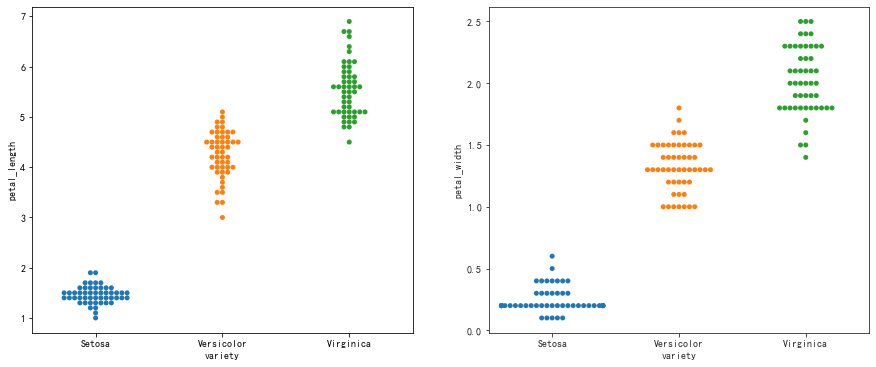

In [17]:
plt.figure(1,figsize=(15,6))

plt.subplot(1,2,1)
sns.swarmplot(x='variety',y='petal_length',data=iris) 

with sns.axes_style("ticks"): # 这次使用了ticks风格
    plt.subplot(1,2,2)
    sns.swarmplot(x='variety',y='petal_width',data=iris)

plt.show()

#### Boxplot
箱形图，主要包含六个数据节点，将一组数据从大到小排列，分别计算出上边缘，上四分位数Q3，中位数，下四分位数Q1，下边缘，还有异常值。
下面将纸鸢花数据集中的四个变量sepal_length, sepal_width, petal_length和petal_width做箱形图可视化。

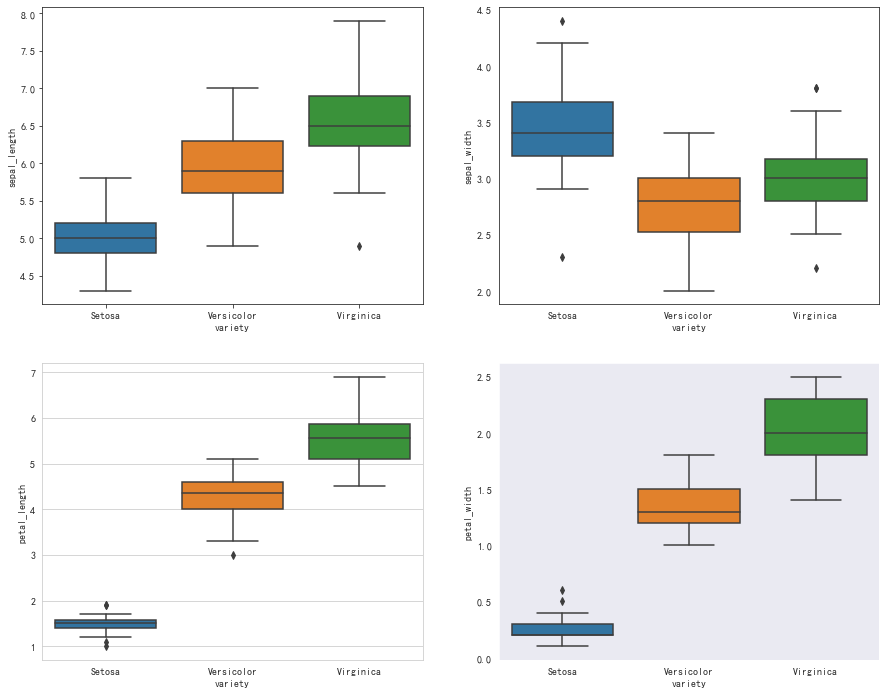

In [18]:
var = ['sepal_length','sepal_width','petal_length','petal_width']
context= ['notebook','paper','talk','poster']
axes_style = ['ticks','white','whitegrid', 'dark']

fig = plt.figure(1,figsize=(15,12))
for i in range(4):
    with sns.axes_style(axes_style[i]): # 将除了默认的darkgrid之外的样式都展现一遍
        plt.subplot(2,2,i+1)
        sns.boxplot(x='variety',y=var[i],data=iris)

plt.show()



#### Violinplot
Violinplot相当于结合了箱形图与核密度图，更好地展现出数据的量化形态。展示如下：

### Barplot
Barplot主要是展现在分类中的quantitative变量的平均值情况，并且用了boostrapping算法计算了估计值的置信区间和error bar.用鸢尾花数据集展示如下：

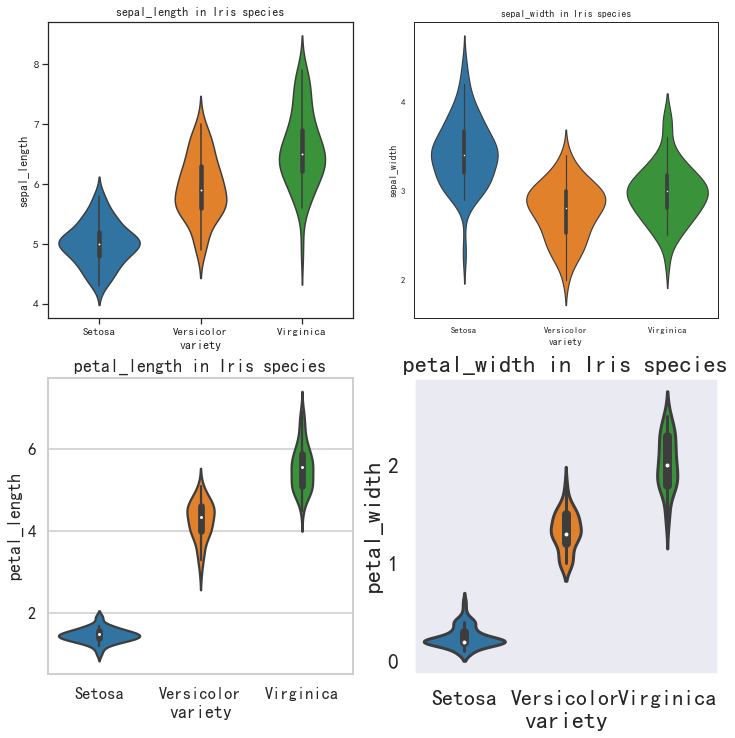

In [19]:
var = ['sepal_length','sepal_width','petal_length','petal_width']
context= ['notebook','paper','talk','poster']
axes_style = ['ticks','white','whitegrid', 'dark']

plt.figure(1,figsize=(12,12))
for i in range(4):
    with sns.axes_style(axes_style[i]):#设置axes_style
        sns.set_context(context[i]) # 设置context style,默认为notebook,除此之外还有paper,talk,poster
        plt.subplot(2,2,i+1)
        plt.title(str(var[i])+ ' in Iris species')
        sns.violinplot(x='variety',y=var[i],data=iris)

plt.show()


Violinplot用kernel density estimate去更好地描述了quantitative变量的分布。
与此同时，也可以组合swarmplot和boxplot或violinplot去描述quantitative变量。用鸢尾花数据集展示如下：

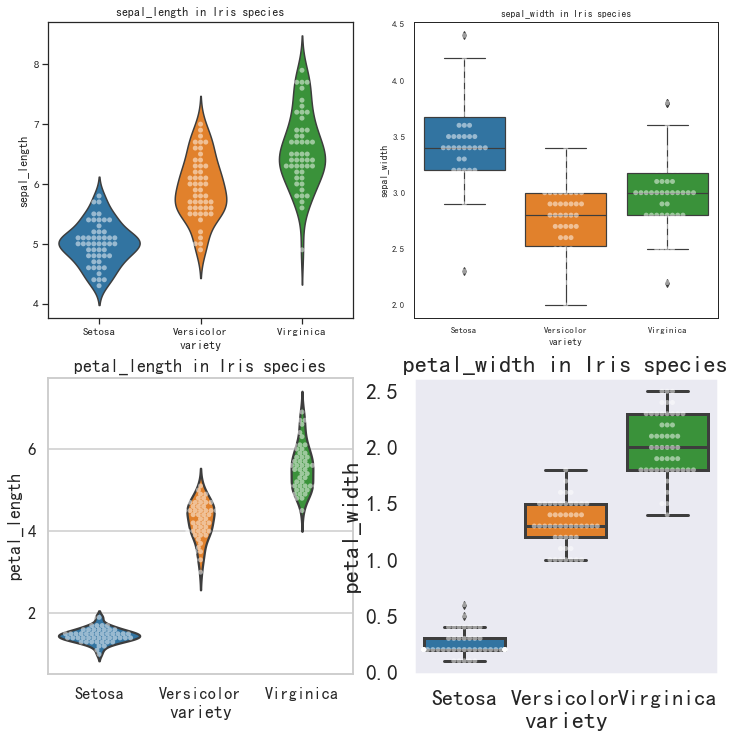

In [20]:
var = ['sepal_length','sepal_width','petal_length','petal_width']
context= ['notebook','paper','talk','poster']
axes_style = ['ticks','white','whitegrid', 'dark']

plt.figure(1,figsize=(12,12))
for i in range(4):
    with sns.axes_style(axes_style[i]):#设置axes_style
        sns.set_context(context[i])#设置context
        plt.subplot(2,2,i+1)
        plt.title(str(var[i])+ ' in Iris species')
        sns.swarmplot(x='variety', y=var[i], data=iris, color="w", alpha=.5) 
        sns.violinplot(x='variety', y=var[i], data=iris, inner=None) if i%2 ==0 \
        else sns.boxplot(x='variety', y=var[i], data=iris) # 分别用swarmplot+violinplot 和swarmplot + boxplot

plt.show()

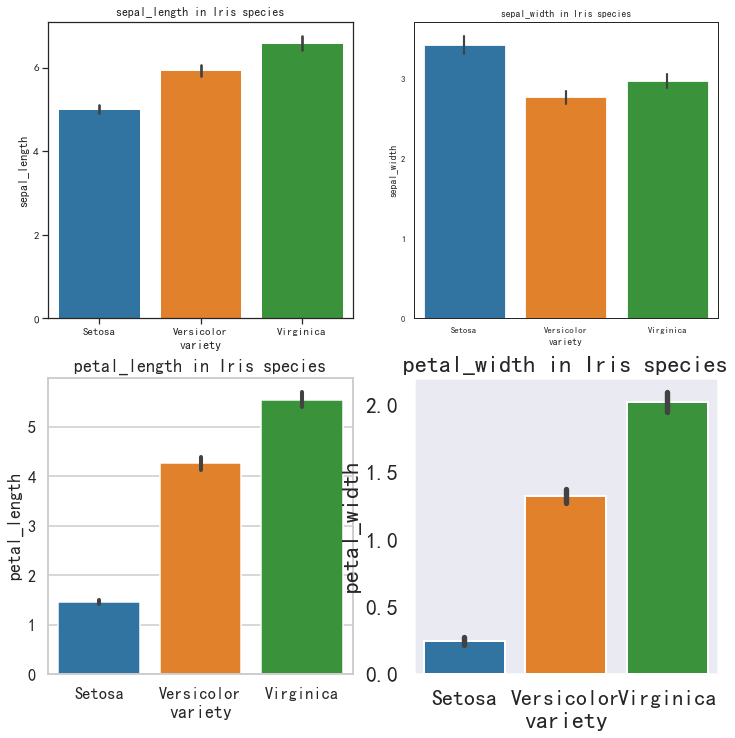

In [21]:
plt.figure(1,figsize=(12,12))
for i in range(4):
    with sns.axes_style(axes_style[i]):#设置axes_style
        sns.set_context(context[i]) # 设置context style,默认为notebook,除此之外还有paper,talk,poster
        plt.subplot(2,2,i+1)
        plt.title(str(var[i])+ ' in Iris species')
        sns.barplot(x='variety',y=var[i],data=iris)
plt.show()

#### Countplot
如果想知道在每个类别下面有多少个观察值，用countplot就可以，相当于是做一个observation counts，用鸢尾花数据集展示如下：

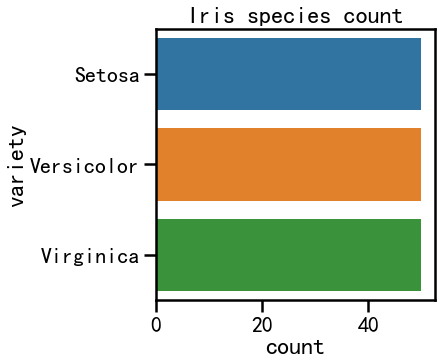

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(y="variety", data=iris) # 设置y='species',将countplot水平放置
plt.title('Iris species count')
plt.show()

#### Pointplot
Pointplot相当于是对barplot做了一个横向延伸，一方面，用point estimate和confidence level去展示barplot的内容；另一方面，当每一个主类别下面有更细分的sub-category的时候，pointplot可以便于观察不同sub-category在各主类别之间的联系。展示如下：

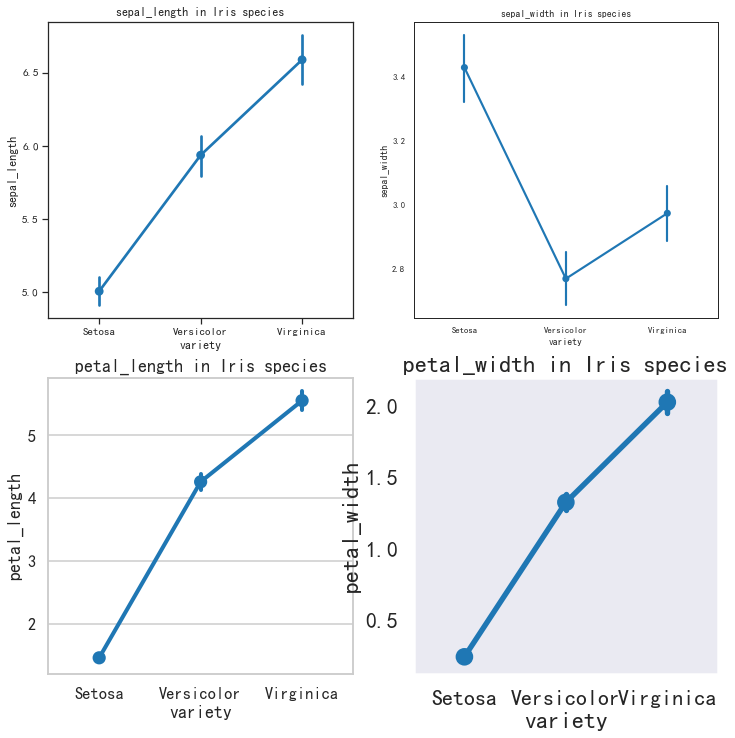

In [23]:
var = ['sepal_length','sepal_width','petal_length','petal_width']
context= ['notebook','paper','talk','poster']
axes_style = ['ticks','white','whitegrid', 'dark']

plt.figure(1,figsize=(12,12))
for i in range(4):
    with sns.axes_style(axes_style[i]):#设置axes_style
        sns.set_context(context[i]) # 设置context style,默认为notebook,除此之外还有paper,talk,poster
        plt.subplot(2,2,i+1)
        plt.title(str(var[i])+ ' in Iris species')
        sns.pointplot(x='variety',y=var[i],data=iris)
plt.show()

#### Factorplot
Factorplot可以说是seaborn做category visualization的精髓，前面讲的这些plot都可以说是factorplot的具体展示。我们可以用PariGrid去实现对多个类别的数值特征用同一种plot做可视化。

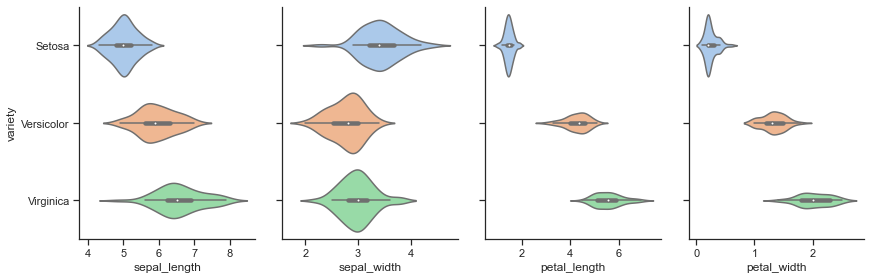

In [24]:
sns.set(style="ticks")
g = sns.PairGrid(iris,
            x_vars = ['sepal_length','sepal_width','petal_length','petal_width'],
            y_vars = 'variety',
            aspect=0.75,size=4) # 设置间距和图片大小
g.map(sns.violinplot,palette='pastel')
plt.show()



#### 看相关性

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


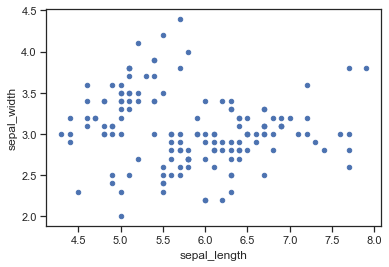

In [25]:
vars = ['sepal_length','sepal_width','petal_length','petal_width']

# 使用 .plot 做散点图
iris.plot(kind="scatter", x="sepal_length", y="sepal_width")#数据为萼片的长和宽 结果如下



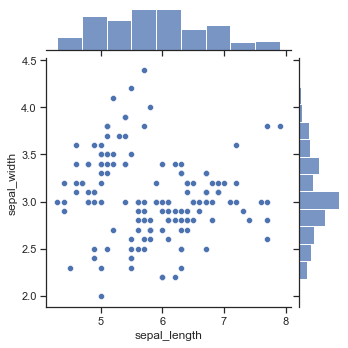

In [26]:
# 开始使用seaborn了它能同时显示直方图噢
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=5)

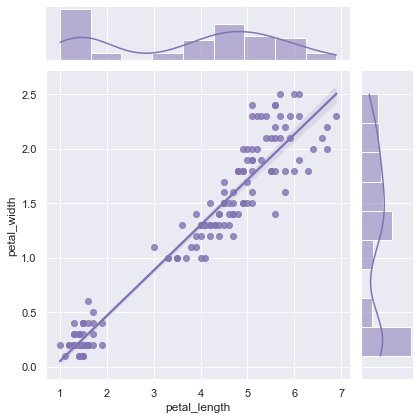

In [27]:
### 交互

sns.set(style="darkgrid")
sns.jointplot('petal_length', 'petal_width', data=iris, kind="reg", color="m")


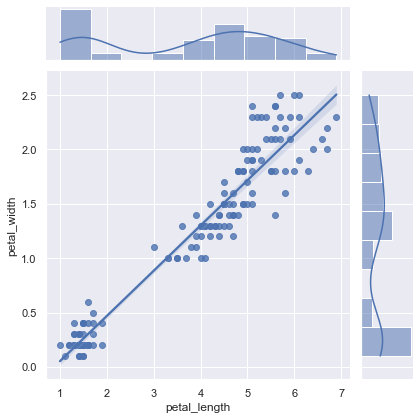

In [28]:
sns.jointplot(data=iris, x="petal_length", y="petal_width", kind="reg")

In [29]:
iris

,sepal_length,sepal_width,petal_length,petal_width,variety,target
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


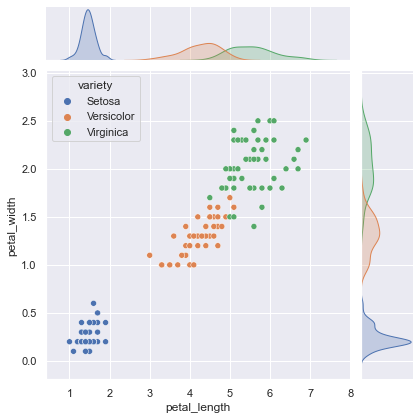

In [30]:

sns.jointplot(data=iris, x="petal_length", y="petal_width", hue="variety")


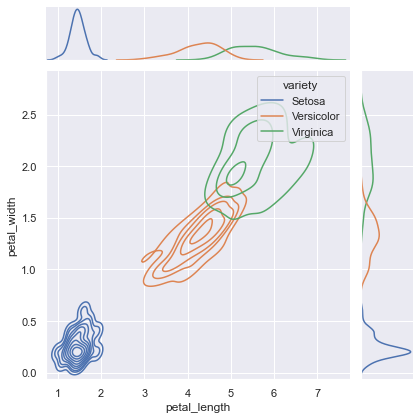

In [31]:
sns.jointplot(data=iris, x="petal_length", y="petal_width", hue="variety", kind="kde")

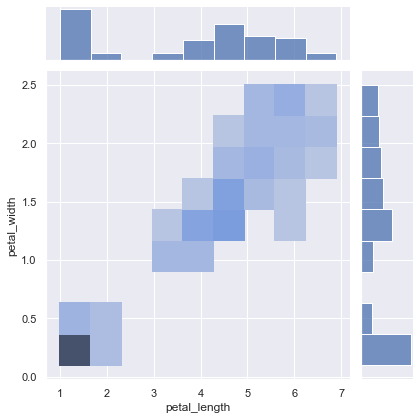

In [32]:
sns.jointplot(data=iris, x="petal_length", y="petal_width", kind="hist")

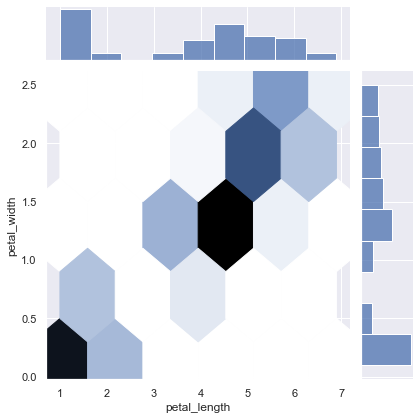

In [33]:
sns.jointplot(data=iris, x="petal_length", y="petal_width", kind="hex")

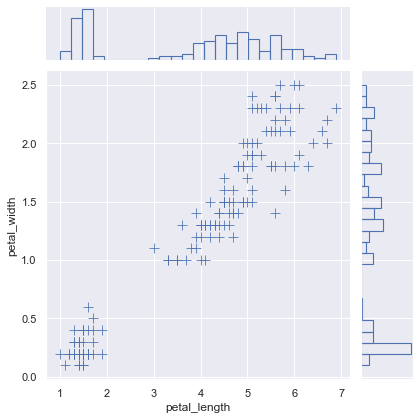

In [34]:
### 自定义
sns.jointplot(
    data=iris, x="petal_length", y="petal_width",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
)

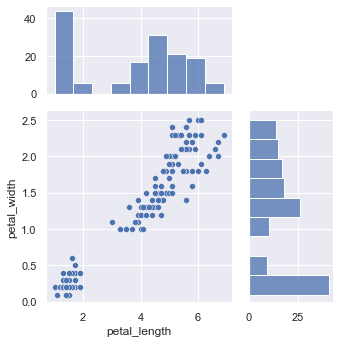

In [35]:
sns.jointplot(data=iris, x="petal_length", y="petal_width",\
    height=5, ratio=2, marginal_ticks=True)



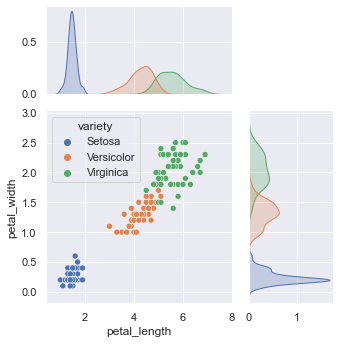

In [36]:
sns.jointplot(data=iris, x="petal_length", y="petal_width",\
    height=5, ratio=2, marginal_ticks=True, hue="variety")



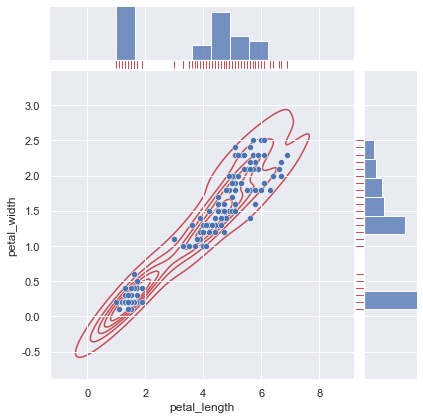

In [37]:
### 联合图
g = sns.jointplot(data=iris, x="petal_length", y="petal_width")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

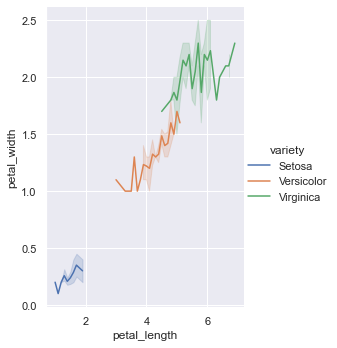

In [38]:

palette = sns.color_palette("rocket_r")
sns.relplot(
    data=iris,
    x="petal_length", y="petal_width",
    hue="variety", 
    kind="line", size_order=["T1", "T2"], 
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)


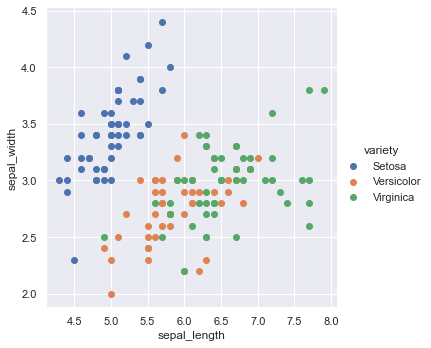

In [39]:
# 我们还可以用seaborn's FacetGrid 标记不同的种类噢
g = sns.FacetGrid(iris, hue="variety", size=5)
g.map(plt.scatter, "sepal_length", "sepal_width")
g.add_legend()

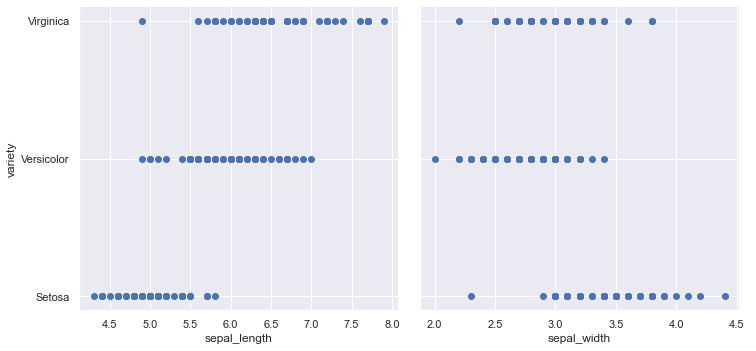

In [40]:
g = sns.PairGrid(iris, x_vars = ['sepal_length','sepal_width'], y_vars="variety", size=5)
g.map(plt.scatter)
g.add_legend()

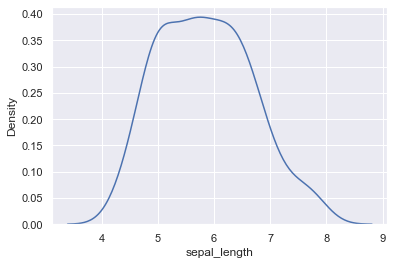

In [41]:
sns.kdeplot(x='sepal_length',data=iris)

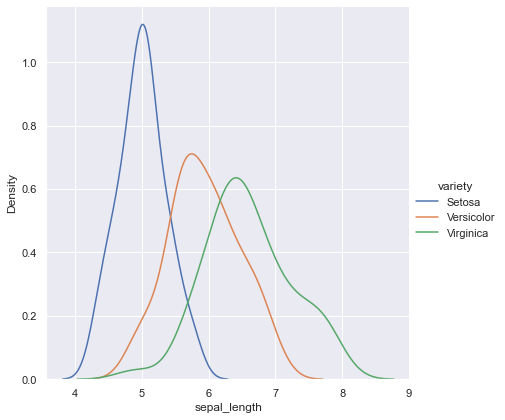

In [42]:
# 通过这个曲线图可以看出不同特征值时的分布密度
sns.FacetGrid(iris, hue="variety", size=6) \
   .map(sns.kdeplot, "sepal_length") \
   .add_legend()

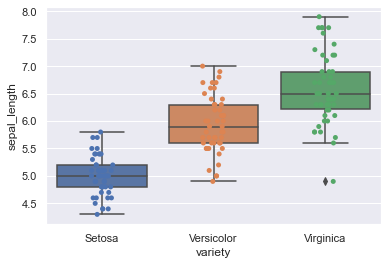

In [43]:
# 利用striplot可以锦上添花，加上散点图
# 使振动值jitter=True 使各个散点分开，要不然会是一条直线
# 注意这里将坐标图用ax来保存了哦，这样第二次才会在原来的基础上加点
ax = sns.boxplot(x="variety", y="sepal_length", data=iris)
ax = sns.stripplot(x="variety", y="sepal_length", data=iris, jitter=True, edgecolor="gray")

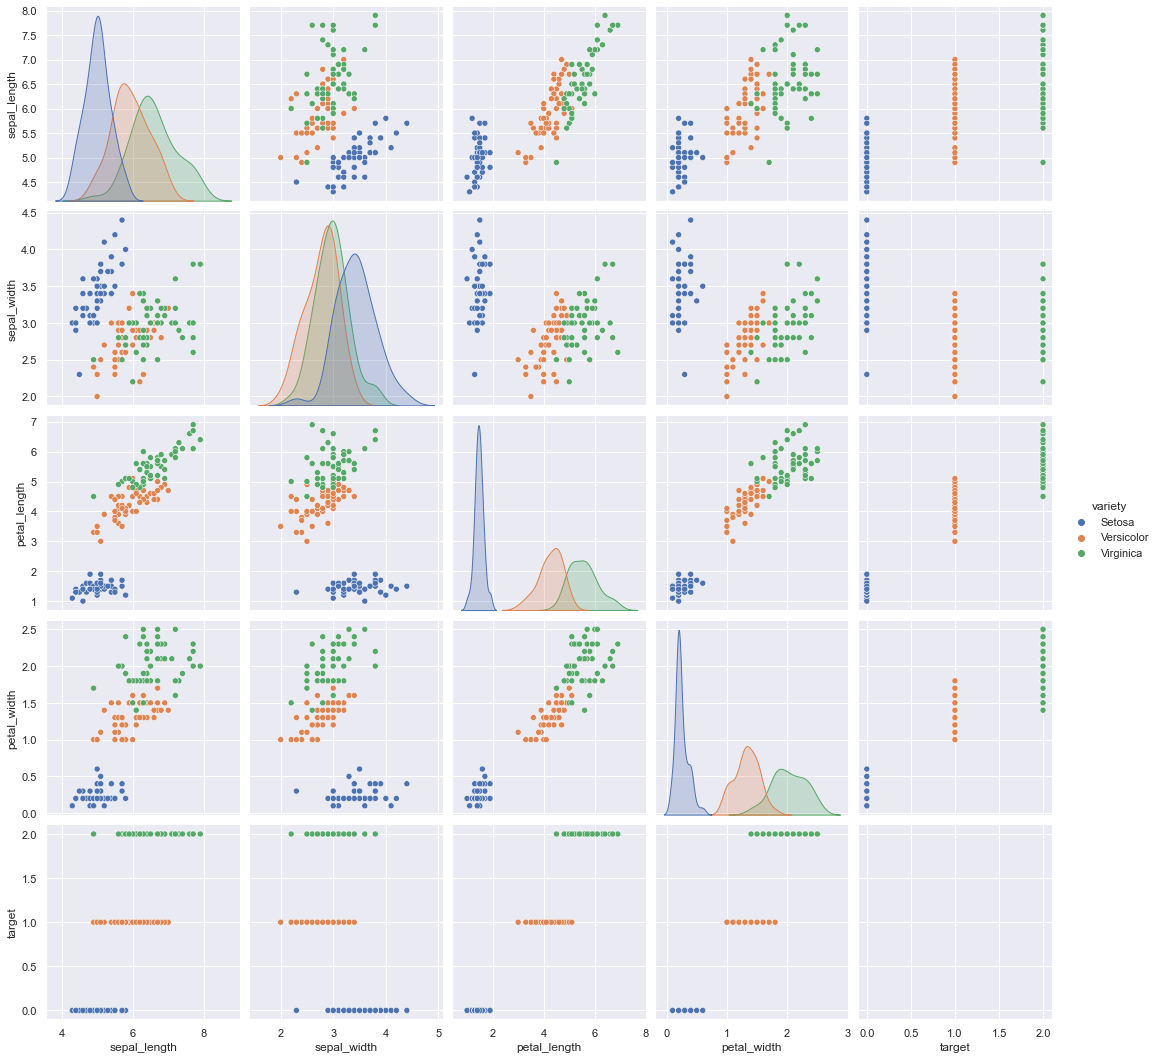

In [44]:
#  pairplot显示不同特征之间的关系
sns.pairplot(iris, hue="variety", size=3)

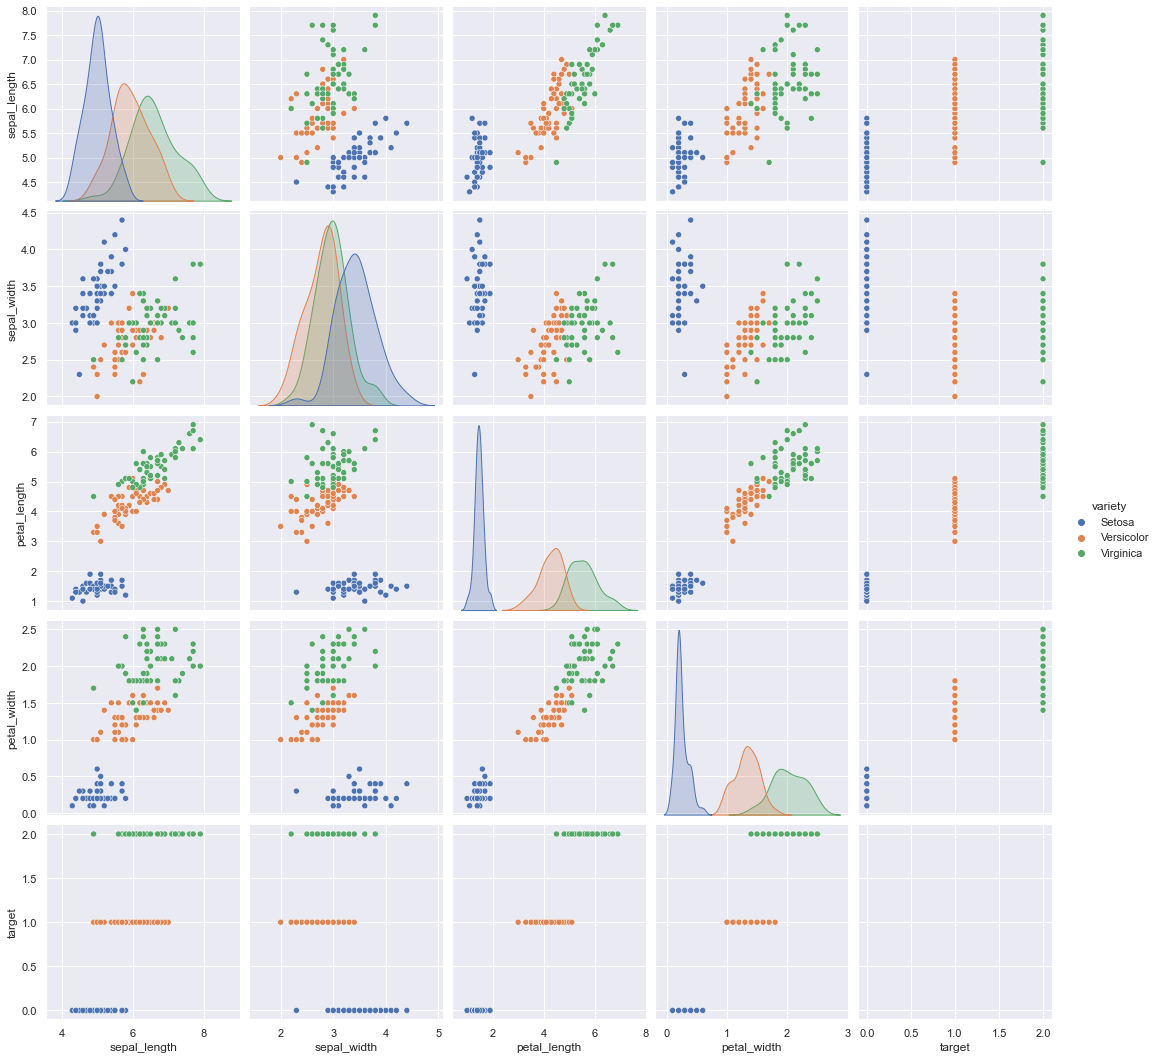

In [45]:
# 修改参数dige_kind
sns.pairplot(iris, hue="variety", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201B0C256D8>,
      dtype=object)

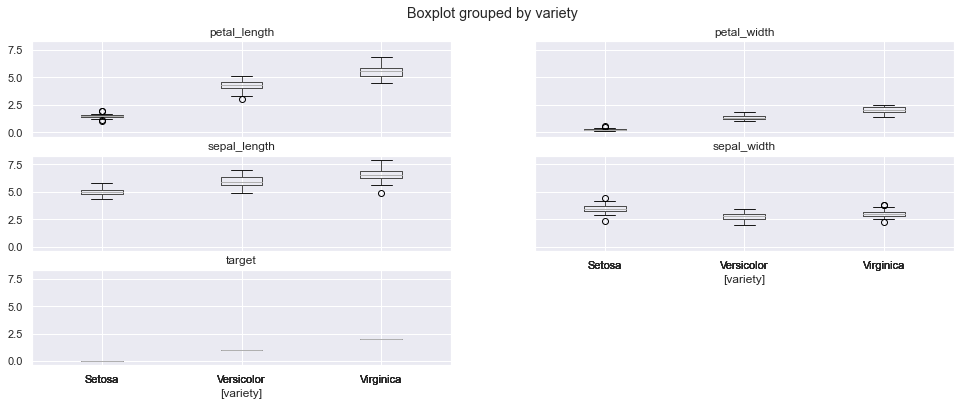

In [46]:
iris.boxplot(by="variety", figsize=(16, 6))

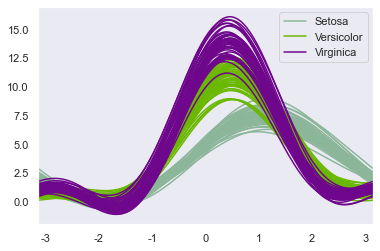

In [47]:
# 画图的函数在下面，我们会发现相同种类的线总是缠绵在一起，可以和聚类混在一起噢，事实上他们与欧氏距离是有关系的
from pandas.plotting import andrews_curves
andrews_curves(iris, "variety")


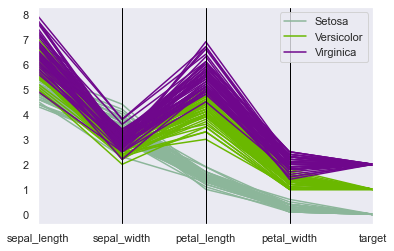

In [48]:
# 轮廓图也是看高维数据的一种方法，将不同的特征放在横坐标，然后将各点的特征值放在纵坐标就可以了
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "variety")



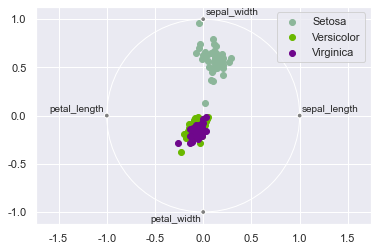

In [49]:
# 这也是一种将高维点表现在二维平面的方法，具体作图方法应该在上面的网址上应该有
from pandas.plotting import radviz
radviz(iris.drop("target", axis=1), "variety")

# pyechart

In [86]:
iris

,sepal_length,sepal_width,petal_length,petal_width,variety,target
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


In [89]:
from pyecharts import options as opts
from pyecharts.charts import Parallel
from itertools import islice

setosa = []
versicolor = []
virginica = []
label = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
with open("../data/iris.csv") as f:
    for i in islice(f, 1, None):
        if i != "":
            rowdata = i.split(",")
            row = []
            row.append(rowdata[0])  # sepal_length
            row.append(rowdata[1])  # sepal_width
            row.append(rowdata[2])  # petal_length
            row.append(rowdata[3])  # petal_width
            target = rowdata[4].replace("\n", "")
            row.append(target)  # target
            if target == "setosa":
                setosa.append(row)
            elif target == "versicolor":
                versicolor.append(row)
            elif target == "virginica":
                virginica.append(row)

c = (
    Parallel()
    .add_schema(
        [
            opts.ParallelAxisOpts(dim=0, name="sepal_length"),
            opts.ParallelAxisOpts(dim=1, name="sepal_width"),
            opts.ParallelAxisOpts(dim=2, name="petal_length"),
            opts.ParallelAxisOpts(dim=3, name="petal_width"),
            opts.ParallelAxisOpts(
                dim=4,
                name="target",
                type_="category",
                data=["setosa", "versicolor", "virginica"],
            ),
        ]
    )
    .add("setosa", setosa)
    .add("versicolor", versicolor)
    .add("virginica", virginica)
    .set_global_opts(title_opts=opts.TitleOpts(title="Parallel-Category"))
    .render("parallel_category.html")
)

d:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


#### 可视化数据方法总结

### 1. matplotlib
Matplotlib是接触最多的可视化库，它可以很轻松地画一些或简单或复杂地图形，几行代码即可生成线图、直方图、功率谱、条形图、错误图、散点图等等。
matplotlib官网：https://matplotlib.org/
win安装方法：pip install matplotlib

***

### 2. Seaborn
如果单单使用matplotlib会显示非常简单，不够美观。Seaborn是基于matplotlib产生的一个模块，专攻于统计可视化，可以和pandas进行无缝链接，初学者很容易上手。相对于matplotlib，Seaborn语法更简洁，两者关系类似于numpy和pandas之间的关系。它能够让绘制图像的样式更加丰富。
seabom官网： http://seaborn.pydata.org/
win安装方法：pip install seaborn

***

### 3.PyEcharts
Echarts 是一个由百度开源的数据可视化，凭借着良好的交互性，精巧的图表设计，得到了众多开发者的认可。而 Python 是一门富有表达力的语言，很适合用于数据处理。当数据分析遇上数据可视化时，pyecharts 诞生了。这个也非常强大，算是我比较喜欢的一个，有兴趣一起见证它的魅力。
pyecharts中文学习文档：https://pyecharts.org/， https://github.com/pyecharts/pyecharts
win安装方法：pip install pyecharts
这个文档特别友好哦！强烈推荐。

***

### 4. Bokeh
Bokeh是一个Python交互式可视化库，支持现代化web浏览器展示（图表可以输出为JSON对象，HTML文档或者可交互的网络应用）。它提供风格优雅、简洁的D3.js的图形化样式，并将此功能扩展到高性能交互的数据集，数据流上。使用Bokeh可以快速便捷地创建交互式绘图、仪表板和数据应用程序等。 Bokeh能与NumPy，Pandas，Blaze等大部分数组或表格式的数据结构完美结合。
Bokeh官网：https://docs.bokeh.org/en/latest/
win安装方法：pip install bokeh
***

### 5. HoloViews
HoloViews是一个开源的Python库，可以用非常少的代码行中完成数据分析和可视化，它将matplotlib和Bokeh结合了起来。
HoloViews官网：http://holoviews.org/
win安装方法：pip install HoloViews

***

### 6. Altair
Altair是Python的一个公认的统计可视化库。它的API简单、友好、一致，并建立在强大的vega - lite（交互式图形语法）之上。Altair API不包含实际的可视化呈现代码，而是按照vega - lite规范发出JSON数据结构。由此产生的数据可以在用户界面中呈现，这种优雅的简单性产生了漂亮且有效的可视化效果，且只需很少的代码。
数据源是一个DataFrame，它由不同数据类型的列组成。DataFrame是一种整洁的格式，其中的行与样本相对应，而列与观察到的变量相对应。数据通过数据转换映射到使用组的视觉属性(位置、颜色、大小、形状、面板等)。
Altair文档：https://altair-viz.github.io/
win安装方法：pip install Altair)

***

### 7. PyQtGraph
PyQtGraph是在PyQt4 / PySide和numpy上构建的纯 python的GUI图形库。PyQtGraph完全是在python中编写的，是一个非常有能力的图形系统，可以进行大量的数据处理，数字运算；使用了Qt的GraphicsView框架优化和简化了工作流程，实现以最少的工作量完成数据可视化，且速度也非常快。
PyQtGraph官网：https://www.pyqtgraph.org/
win安装方法：pip install PyQtGraph
***

### 8. ggplot
ggplot是基于R的ggplot2和图形语法的Python的绘图系统，实现了更少的代码绘制更专业的图形。
它使用一个高级且富有表现力的API来实现线，点等元素的添加，颜色的更改等不同类型的可视化组件的组合或添加，而不需要重复使用相同的代码，然而这对那些试图进行高度定制的的来说，ggplot并不是最好的选择，尽管它也可以制作一些非常复杂、好看的图形。
ggplot与pandas紧密联系。如果你打算使用ggplot，最好将数据保存在DataFrames中。
因为他基于R语言，所以R语言也有这个库。
ggplot文档：https://realpython.com/ggplot-python/
win安装方法：pip install ggplot‑0.11.5‑py2.py3‑none‑any.whl
***

### 9. pygal
pygal是一种开放标准的矢量图形语言，它基于XML（Extensible Markup Language），可以生成多个输出格式的高分辨率Web图形页面，还支持给定数据的html表导出。用户可以直接用代码来描绘图像，可以用任何文字处理工具打开SVG图像，通过改变部分代码来使图像具有交互功能，并且可以插入到HTML中通过浏览器来观看。
pygal官网：https://www.pygal.org/en/stable/
win安装方法：python -m pip install --user pygal==1.7
***

### 10. VisPy
VisPy是一个用于交互式科学可视化的Python库，快速、可伸缩、且易于使用，是一个高性能的交互式2维， 3维数据可视化库，利用了现代图形处理单元(gpu)的计算能力，通过OpenGL库来显示非常大的数据集。
VisPy官网：https://vispy.org/
win安装方法：pip install VisPy
***

### 11. NetworkX
NetworkX是一个Python包，用于创建、操纵和研究复杂网络的结构、以及学习复杂网络的结构、功能及其动力学。
NetworkX提供了适合各种数据结构的图表、二合字母和多重图，还有大量标准的图算法，网络结构和分析措施，可以产生随机网络、合成网络或经典网络，且节点可以是文本、图像、XML记录等，并提供了一些示例数据(如权重，时间序列)。
NetworkX测试的代码覆盖率超过90%，是一个多样化，易于教学，能快速生成图形的Python平台。
NetworkX中文手册：https://networkx.org/
win安装方法：pip install networkx

***
### 12. Plotly
Plotly的Python graphing library在网上提供了交互式的、公开的，高质量的图表集，可与R、python、matlab等软件对接。它拥有在别的库中很难找到的几种图表类型，如等值线图，树形图和三维图表等，图标类型也十分丰富，申请了API**后，可以一键将统计图形同步到云端。但美中不足的是，打开国外网站会比较费时，且一个账号只能创建25个图表，除非你升级或删除一些图表。
Plotly官网：https://plotly.com/
win安装方法：pip install plotly
***
### 13. mpld3
mpld3基于python的graphing library和D3js，汇集了Matplotlib流行的项目的JavaScript库，用于创建web交互式数据可视化。通过一个简单的API，将matplotlib图形导出为HTML代码，这些HTML代码可以在浏览器内使用。
mpld3官网：https://github.com/mpld3/mpld3
win安装方法：pip install mpld3

***
### 14. python-igraph
Python界面的igraph高性能图形库，主要针对复杂的网络研究和分析。这个主要是用于绘制关系图的。
python-igraph文档：https://igraph.org/python/
win安装方法：pip install python-igraph
***

### 15. missingno
做监督学习算法时，难免会碰到混乱的数据集，缺失的值，当缺失比例很小时，可直接对缺失记录进行舍弃或进行手工处理，missingno提供了一个小型的灵活的、易于使用的数据可视化和实用工具集，能够通过图像快速评估数据缺失的情况，而不是在数据表里面步履维艰。可以根据数据的完整度对数据进行排序或过滤，还可以根据热度图或树状图来考虑对数据进行修正。
missingno 是基于matplotlib建造的一个模块，所以它出图速度很快，并且能够灵活的处理pandas数据。
missingno 官方：https://github.com/ResidentMario/missingno
win安装方法：pip install missingno
***

### 16. Mayavi2
Mayavi2是一个通用的、跨平台的三维科学数据可视化工具。可以在二维和三维空间中显示标量、向量和张量数据。可通过自定义源、模块和数据过滤器轻松扩展。Mayavi2也可以作为一个绘图引擎，生成matplotlib或gnuplot脚本，也可以作为其他应用程序的交互式可视化的库，将生成的图片嵌入到其他应用程序中。
Mayavi2官网
win安装方法：pip install mayavi
***

### 17. Leather
Leather一种可读且用户界面友好的API，新手也能快速掌握。图像成品非常基础，适用于所有的数据类型，针对探索性图表进行了优化，产生与比例无关的SVG图，这样在你调整图像大小的时候就不会损失图像质量
Leather文档
win安装方法：pip install leather
***

### 18. Gleam
Gleam允许只利用Python构建数据的交互式，生成可视化的网络应用。无需具备HTML CSS或JaveScript知识，就能使用任一种Python可视化库控制输入。当你创建一个图表的时候，你可以在上面加上一个域，让任何人都可以实时地玩转你的数据，让你的数据更通俗易懂。
Gleam文档：https://github.com/dgrtwo/gleam
win安装方法：pip install Gleam
***

地图类
有一些库对于绘制地图、经纬度坐标点等比较友好。

### 19. geoplotlib
Basemap和Cartopy包支持多个地理投影，并提供一些可视化效果，包括点图、热图、等高线图和形状文件。PySAL是一个由Python编写的空间分析函数的开源库，它提供了许多基本的工具，主要用于形状文件。但是，这些库不允许用户绘制地图贴图，并且对自定义可视化、交互性和动画的支持有限。
geoplotlib是python的一个用于地理数据可视化和绘制地图的工具箱，并提供了一个原始数据和所有可视化之间的基本接口，支持在纯python中开发硬件加速的交互式可视化，并提供点映射、内核密度估计、空间图、泰森多边形图、形状文件和许多更常见的空间可视化的实现。除了为常用的地理数据可视化提供内置的可视化功能外，geoplotlib还允许通过定义定制层来定义复杂的数据可视化（绘制OpenGL，如分数、行和具有高性能的多边形），创建动画。
geoplotlib文档
win安装方法：pip install geoplotlib
***

### 20. folium
folium是一个建立在Python系统之上的js库，可以很轻松地将在Python中操作的数据可视化为交互式的单张地图，且将紧密地将数据与地图联系在一起，可自定义箭头，网格等HTML格式的地图标记。该库还附有一些内置的地形数据。在一次用到经纬度的数据挖掘比赛中遇到了它，感觉挺不错的。
folium文档
win安装方法：pip install folium

***

### 21. Vincent
Vincent是一个很酷的可视化工具，它以Python数据结构作为数据源，然后把它翻译成Vega可视化语法，并且能够在d3js上运行。这让你可以使用Python脚本来创建漂亮的3D图形来展示你的数据。Vincent底层使用Pandas和DataFrames数据，并且支持大量的图表—-条形图、线图、散点图、热力图、堆条图、分组条形图、饼图、圈图、地图等等。
文档：https://github.com/vega/vega
安装：pip install vincent

### 22. pandas
win安装方法：pip install pandas

***
